# Квантовое кодирование

In [22]:
import sys

sys.path.append('..')

### 1. Оператор Адамара

$$
    H = \frac{1}{\sqrt{2}} \begin{pmatrix}
        1 & 1 \\
        1 & -1 \\
    \end{pmatrix}
$$

действует на 1 кубит, который был в состоянии |0> до применения оператора Адамара

In [23]:
import qiskit
import qiskit_aer

qc = qiskit.QuantumCircuit(1, 1)

qc.h(0)

qc.measure(0, 0)

qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [24]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'1': 524, '0': 500}

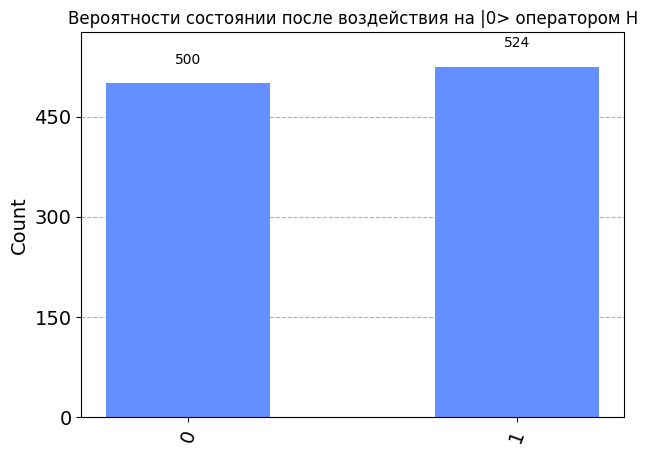

In [25]:
qiskit.visualization.plot_histogram(counts, title='Вероятности состоянии после воздействия на |0> оператором H')

### 2. Квантовая генерация числа

Берем 3 кубита, количество состоянии будет 8.

Если вероятность выпавшего состояния > 0.5, то для данного стояния присваиваем классический бит 1, иначе 0.

Таким образом получаем 8 битное число.

In [26]:
from modules.utils.random import qrng

m = 10

for _ in range(m):
    circuit, bits, counts = qrng(3, 1024)
    print(f'{counts} -> {bits}, {int(bits, 2)}')

circuit.draw()

{'111': 130, '101': 141, '110': 139, '010': 121, '100': 133, '000': 132, '001': 119, '011': 109} -> 11101100, 236
{'001': 127, '101': 135, '110': 121, '010': 137, '000': 135, '100': 124, '011': 129, '111': 116} -> 01011010, 90
{'011': 133, '110': 136, '101': 116, '010': 121, '100': 128, '000': 115, '111': 145, '001': 130} -> 11000011, 195
{'100': 131, '010': 120, '110': 115, '011': 146, '000': 120, '101': 142, '111': 117, '001': 133} -> 10010101, 149
{'100': 153, '010': 120, '111': 139, '110': 134, '101': 114, '011': 125, '001': 122, '000': 117} -> 10110000, 176
{'100': 143, '001': 130, '011': 131, '101': 123, '110': 141, '111': 121, '010': 106, '000': 129} -> 11101001, 233
{'110': 120, '001': 127, '100': 130, '011': 127, '111': 131, '010': 129, '101': 127, '000': 133} -> 00101101, 45
{'011': 136, '111': 114, '001': 133, '100': 150, '110': 113, '000': 132, '101': 123, '010': 123} -> 10110100, 180
{'011': 145, '000': 131, '010': 125, '100': 127, '110': 118, '001': 126, '101': 121, '111'

┌───┐┌─┐      
qr_0: ┤ H ├┤M├──────
      ├───┤└╥┘┌─┐   
qr_1: ┤ H ├─╫─┤M├───
      ├───┤ ║ └╥┘┌─┐
qr_2: ┤ H ├─╫──╫─┤M├
      └───┘ ║  ║ └╥┘
cr: 3/══════╩══╩══╩═
            0  1  2

### 3. Сверхплотное кодирование

 <center>
    <img src="../images/super-dense-coding.png" width="520">
</center>

$$
    Z = \begin{pmatrix}
        1 & 0 \\
        0 & -1 \\
    \end{pmatrix},

    X = \begin{pmatrix}
        0 & 1 \\
        1 & 0 \\
    \end{pmatrix},

    XZ = \begin{pmatrix}
        0 & -1 \\
        1 & 0 \\
    \end{pmatrix}
$$

действуют на 1 кубит, который был в состоянии |0> до применения оператора

In [27]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

superdense = QuantumCircuit(q, c, name='superdense')

superdense.h(q[0])
superdense.cx(q[0], q[1])

# Алиса хочет отправить 00, тогда ничего не делаем

# Алиса хочет отправить 01, тогда применяем оператор Z на первый кубит
# superdense.z(q[0])

# Алиса хочет отправить 10, тогда применяем оператор X на первый кубит
# superdense.x(q[0])

# Алиса хочет отправить 11, тогда применяем оператор XZ на первый кубит
superdense.z(q[0])
superdense.x(q[0])

superdense.barrier()

# Боб
superdense.cx(q[0], q[1])
superdense.h(q[0])

superdense.measure(q[0], c[0])
superdense.measure(q[1], c[1])

superdense.draw()

┌───┐     ┌───┐ ░      ┌───┐┌─┐
q_0: ┤ H ├──■──┤ X ├─░───■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘ ░ ┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├──────░─┤ X ├─┤M├──╫─
          └───┘      ░ └───┘ └╥┘  ║ 
c: 2/═════════════════════════╩═══╩═
                              1   0

In [28]:
simulator = AerSimulator()

result = simulator.run([superdense]).result()
counts = result.get_counts('superdense')

counts

{'10': 1024}